**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "hic_intact_K562_ENCSR479XDG"
)
vec = dir(txt_fdiry)
print(vec)

[1] "fcc_astarr_macs_input_overlap.hic_intact_Loop_A_ENCSR479XDG.bed.gz"
[2] "fcc_astarr_macs_input_overlap.hic_intact_Loop_B_ENCSR479XDG.bed.gz"
[3] "fcc_astarr_macs_input_overlap.hic_intact_TAD_ENCSR479XDG.bed.gz"   


In [3]:
txt_region_folder_A = "fcc_astarr_macs"
txt_region_folder_B = "hic_intact_K562_ENCSR479XDG"

txt_fdiry = file.path(FD_RES, "region", txt_region_folder_A, "summary")
txt_fname = "description.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)
dat_cname = read_tsv(txt_fpath, show_col_types = FALSE)
vec_txt_cname_A = dat_cname$Name

txt_fdiry = file.path(FD_RES, "region", txt_region_folder_B, "summary")
txt_fname = "description.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)
dat_cname = read_tsv(txt_fpath, show_col_types = FALSE)
vec_txt_cname_B = dat_cname$Name

vec_txt_cname = c(
    paste0(vec_txt_cname_A, "_A"),
    paste0(vec_txt_cname_B, "_B"),
    "Overlap"
)

In [5]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "hic_intact_K562_ENCSR479XDG"
)

txt_fname = "fcc_astarr_macs_input_overlap.hic_intact_Loop_A_ENCSR479XDG.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)
dat1 = read_tsv(txt_fpath, col_names = vec_txt_cname)

txt_fname = "fcc_astarr_macs_input_overlap.hic_intact_Loop_B_ENCSR479XDG.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)
dat2 = read_tsv(txt_fpath, col_names = vec_txt_cname)

dat = bind_rows(dat1, dat2)

dat_region_import = dat
print(dim(dat))
head(dat)

Rows: 46906 Columns: 10
── Column specification ───────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): Chrom_A, Chrom_B, Name_B, Group_B, Label_B
dbl (5): ChromStart_A, ChromEnd_A, ChromStart_B, ChromEnd_B, Overlap

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 47071 Columns: 10
── Column specification ───────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): Chrom_A, Chrom_B, Name_B, Group_B, Label_B
dbl (5): ChromStart_A, ChromEnd_A, ChromStart_B, ChromEnd_B, Overlap

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 93977    10


Chrom_A,ChromStart_A,ChromEnd_A,Chrom_B,ChromStart_B,ChromEnd_B,Name_B,Group_B,Label_B,Overlap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
chr1,778233,779389,chr1,770000,780000,chr1:770000-780000|chr1:840000-850000,hic_intact,Loop_A,1156
chr1,903783,905204,chr1,904000,906000,chr1:904000-906000|chr1:976000-978000,hic_intact,Loop_A,1204
chr1,920937,921509,chr1,920000,925000,chr1:920000-925000|chr1:1060000-1065000,hic_intact,Loop_A,572
chr1,923427,925161,chr1,920000,925000,chr1:920000-925000|chr1:1060000-1065000,hic_intact,Loop_A,1573
chr1,979401,980599,chr1,980000,990000,chr1:980000-990000|chr1:1290000-1300000,hic_intact,Loop_A,599
chr1,984073,984542,chr1,984000,985000,chr1:984000-985000|chr1:1063000-1064000,hic_intact,Loop_A,469


In [6]:
###
dat = dat_region_import

###
vec = str_split(txt_fname, "\\.")[[1]]
txt_annot_A = vec[1]
txt_annot_B = vec[2]

###
dat = dat %>% 
    dplyr::mutate(
        Region_A = paste0(Chrom_A, ":", ChromStart_A, "-", ChromEnd_A),
        Region_B = paste0(Chrom_B, ":", ChromStart_B, "-", ChromEnd_B),
        Annotation_A = txt_annot_A,
        Annotation_B = txt_annot_B
    )
dat_region_arrange = dat
print(dim(dat))
head(dat)

[1] 93977    14


Chrom_A,ChromStart_A,ChromEnd_A,Chrom_B,ChromStart_B,ChromEnd_B,Name_B,Group_B,Label_B,Overlap,Region_A,Region_B,Annotation_A,Annotation_B
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr1,778233,779389,chr1,770000,780000,chr1:770000-780000|chr1:840000-850000,hic_intact,Loop_A,1156,chr1:778233-779389,chr1:770000-780000,fcc_astarr_macs_input_overlap,hic_intact_Loop_B_ENCSR479XDG
chr1,903783,905204,chr1,904000,906000,chr1:904000-906000|chr1:976000-978000,hic_intact,Loop_A,1204,chr1:903783-905204,chr1:904000-906000,fcc_astarr_macs_input_overlap,hic_intact_Loop_B_ENCSR479XDG
chr1,920937,921509,chr1,920000,925000,chr1:920000-925000|chr1:1060000-1065000,hic_intact,Loop_A,572,chr1:920937-921509,chr1:920000-925000,fcc_astarr_macs_input_overlap,hic_intact_Loop_B_ENCSR479XDG
chr1,923427,925161,chr1,920000,925000,chr1:920000-925000|chr1:1060000-1065000,hic_intact,Loop_A,1573,chr1:923427-925161,chr1:920000-925000,fcc_astarr_macs_input_overlap,hic_intact_Loop_B_ENCSR479XDG
chr1,979401,980599,chr1,980000,990000,chr1:980000-990000|chr1:1290000-1300000,hic_intact,Loop_A,599,chr1:979401-980599,chr1:980000-990000,fcc_astarr_macs_input_overlap,hic_intact_Loop_B_ENCSR479XDG
chr1,984073,984542,chr1,984000,985000,chr1:984000-985000|chr1:1063000-1064000,hic_intact,Loop_A,469,chr1:984073-984542,chr1:984000-985000,fcc_astarr_macs_input_overlap,hic_intact_Loop_B_ENCSR479XDG


In [11]:
dat = dat_region_arrange
dat = dat %>% 
    dplyr::select(
        Chrom_A, ChromStart_A, ChromEnd_A, 
        Chrom_B, ChromStart_B, ChromEnd_B, 
        Region_A, Name_B) %>% 
    dplyr::distinct() %>%
    dplyr::group_by(Chrom_A, ChromStart_A, ChromEnd_A, Region_A, Name_B) %>%
    dplyr::summarise(
        ChromLoc_B = mean(ChromStart_B),
        .groups = "drop"
    )

dat_region_simplify = dat
print(dim(dat))
head(dat)

[1] 93977     6


Chrom_A,ChromStart_A,ChromEnd_A,Region_A,Name_B,ChromLoc_B
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
chr1,778233,779389,chr1:778233-779389,chr1:770000-780000|chr1:840000-850000,770000
chr1,842516,843431,chr1:842516-843431,chr1:770000-780000|chr1:840000-850000,840000
chr1,849583,850403,chr1:849583-850403,chr1:770000-780000|chr1:840000-850000,840000
chr1,903783,905204,chr1:903783-905204,chr1:904000-906000|chr1:976000-978000,904000
chr1,920937,921509,chr1:920937-921509,chr1:920000-925000|chr1:1060000-1065000,920000
chr1,923427,925161,chr1:923427-925161,chr1:920000-925000|chr1:1060000-1065000,920000


In [30]:
dat = dat_region_simplify
dat = dat %>% 
    dplyr::filter(Chrom_A == "chrX") %>% 
    dplyr::mutate(Value = 1) %>%
    dplyr::distinct() 

dat = dat %>% dplyr::arrange(ChromLoc_B)
vec = unique(dat$Name_B)
dat = dat %>% dplyr::mutate(Name_B = factor(Name_B, levels=vec))

dat = dat %>% dplyr::arrange(Chrom_A, ChromStart_A, ChromEnd_A)
vec = unique(dat$Region_A)
dat = dat %>% dplyr::mutate(Region_A = factor(Region_A, levels=rev(vec)))

print(dim(dat))

[1] 2132    7


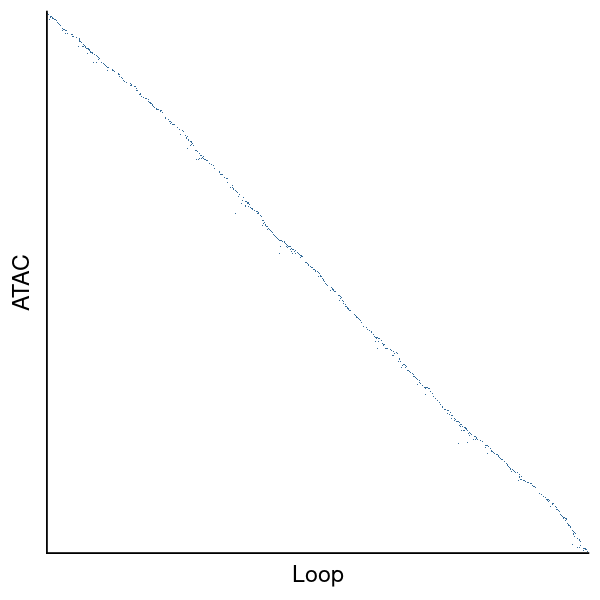

In [31]:
gpt = ggplot(dat, aes(x=Name_B, y=Region_A, fill=Value)) +
    geom_tile() + 
    labs(x="Loop", y="ATAC") +
    theme_cowplot() +
    theme(
        axis.text  = element_blank(),
        axis.ticks = element_blank(),
        legend.position = "None"
    )

options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)

In [32]:
dat = dat_region_simplify
dat = dat %>% 
    dplyr::filter(Chrom_A == "chrX") %>% 
    dplyr::mutate(Value = 1) %>%
    dplyr::distinct()

tmp = dat %>%
    dplyr::group_by(Name_B) %>%
    dplyr::summarize(Count = n()) %>%
    dplyr::filter(Count > 1)
vec = tmp$Name_B

dat = dat %>% dplyr::filter(Name_B %in% vec)
dat = dat %>% dplyr::arrange(ChromLoc_B)
vec = unique(dat$Name_B)
dat = dat %>% dplyr::mutate(Name_B = factor(Name_B, levels=vec))

dat = dat %>% dplyr::arrange(Chrom_A, ChromStart_A, ChromEnd_A)
vec = unique(dat$Region_A)
dat = dat %>% dplyr::mutate(Region_A = factor(Region_A, levels=rev(vec)))

print(dim(dat))

[1] 1756    7


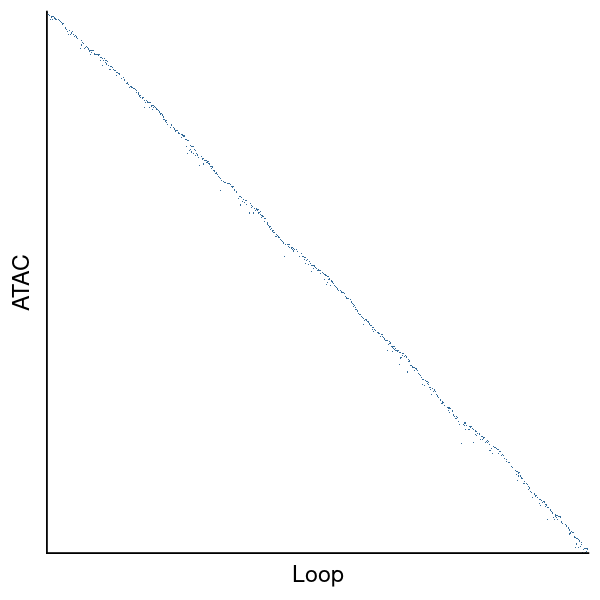

In [33]:
gpt = ggplot(dat, aes(x=Name_B, y=Region_A, fill=Value)) +
    geom_tile() + 
    labs(x="Loop", y="ATAC") +
    theme_cowplot() +
    theme(
        axis.text  = element_blank(),
        axis.ticks = element_blank(),
        legend.position = "None"
    )

options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)

In [38]:
dat = dat_region_simplify
dat = dat %>% 
    dplyr::filter(Chrom_A == "chrX") %>% 
    dplyr::mutate(Value = 1) %>%
    dplyr::distinct()

tmp = dat %>%
    dplyr::group_by(Name_B) %>%
    dplyr::summarize(Count = n()) %>%
    dplyr::filter(Count > 3)
vec = tmp$Name_B

dat = dat %>% dplyr::filter(Name_B %in% vec)
dat = dat %>% dplyr::arrange(ChromLoc_B)
vec = unique(dat$Name_B)
dat = dat %>% dplyr::mutate(Name_B = factor(Name_B, levels=vec))

dat = dat %>% dplyr::arrange(Chrom_A, ChromStart_A, ChromEnd_A)
vec = unique(dat$Region_A)
dat = dat %>% dplyr::mutate(Region_A = factor(Region_A, levels=rev(vec)))

print(dim(dat))

[1] 235   7


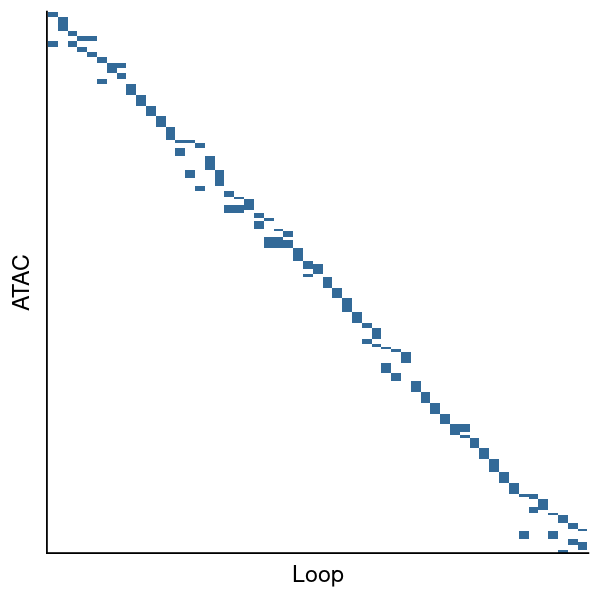

In [39]:
gpt = ggplot(dat, aes(x=Name_B, y=Region_A, fill=Value)) +
    geom_tile() + 
    labs(x="Loop", y="ATAC") +
    theme_cowplot() +
    theme(
        axis.text  = element_blank(),
        axis.ticks = element_blank(),
        legend.position = "None"
    )

options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)